In [11]:
import chess
board = chess.Board()


In [12]:
board.legal_moves
import random
random.choice(list(board.legal_moves))

Move.from_uci('f2f3')

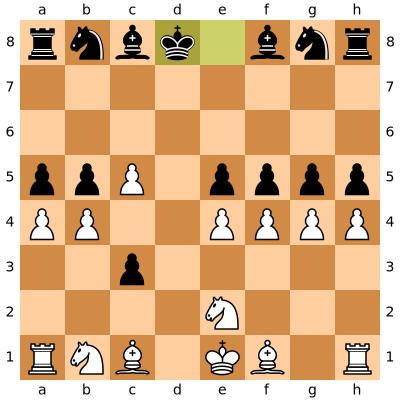

In [29]:
board

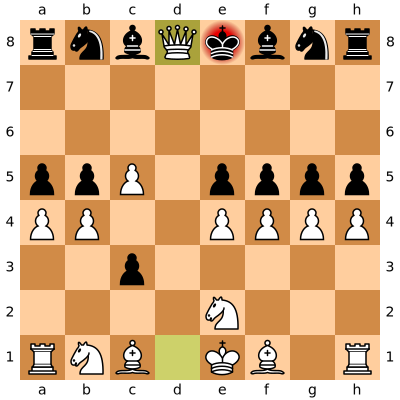

In [6]:
board.push_san("Qxd8+")
board

In [124]:
board.pop()


Move.from_uci('c4c3')

In [3]:
board.push_san("a4")
board.push_san("a5")

board.push_san("b4")
board.push_san("b5")

board.push_san("c4")
board.push_san("c5")

board.push_san("d4")
board.push_san("d5")

board.push_san("f4")
board.push_san("f5")

board.push_san("e4")
board.push_san("e5")

board.push_san("g4")
board.push_san("g5")

board.push_san("h4")
board.push_san("h5")

board.push_san("Ne2")

board.push_san("dxc4")
board.push_san("dxc5")

board.push_san("c3")




Move.from_uci('c4c3')

In [66]:
board.push_san("dxc5")
board.push_san("dxc4")

board.push_san("bxa5")
board.push_san("bxa4")

Move.from_uci('b5a4')

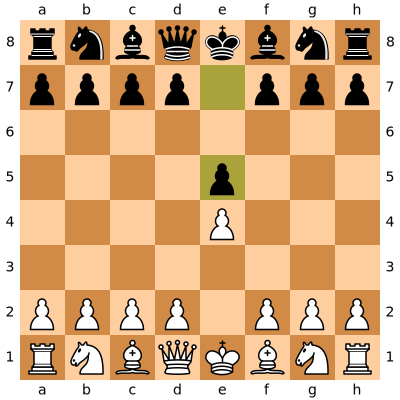

In [12]:
board.push_san("e5")


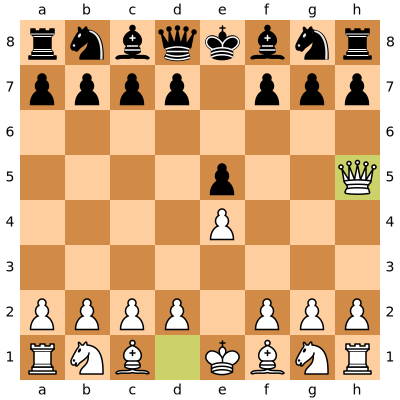

In [13]:
board.push_san("Qh5")


In [119]:
board.fen()

'rnbqkbnr/8/8/ppP1pppp/PP2PPPP/2N5/8/RNBQKB1R b KQkq - 0 11'

In [100]:
board = chess.Board('rnbqkbnr/8/8/ppP1pppp/PP2PPPP/2p5/4N3/RNBQKB1R w KQkq - 0 11')

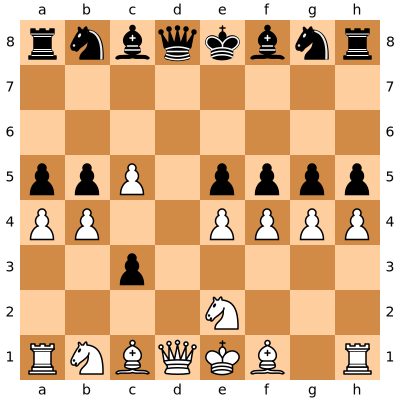

In [101]:
board

In [107]:
board.is_checkmate()

False

In [118]:
print(board)

r n b q k b n r
. . . . . . . .
. . . . . . . .
p p P . p p p p
P P . . P P P P
. . N . . . . .
. . . . . . . .
R N B Q K B . R


In [129]:
type(board)

chess.Board

In [151]:
board.legal_moves

<LegalMoveGenerator at 0x588f5f8 (Nd4, Ng3, Nexc3, Ng1, Rh3, Rh2, Rg1, Bh3, Bg2, Kf2, Qxd8+, Qd7+, Qd6, Qd5, Qd4, Qd3, Qb3, Qd2, Qc2, Be3, Ba3, Bd2, Bb2, Nbxc3, Na3, Nd2, Ra3, Ra2, hxg5, gxh5, gxf5, fxg5, fxe5, exf5, bxa5, axb5, c6)>

In [154]:
print(board.move_stack)

deque([Move.from_uci('a2a4'), Move.from_uci('a7a5'), Move.from_uci('b2b4'), Move.from_uci('b7b5'), Move.from_uci('c2c4'), Move.from_uci('c7c5'), Move.from_uci('d2d4'), Move.from_uci('d7d5'), Move.from_uci('f2f4'), Move.from_uci('f7f5'), Move.from_uci('e2e4'), Move.from_uci('e7e5'), Move.from_uci('g2g4'), Move.from_uci('g7g5'), Move.from_uci('h2h4'), Move.from_uci('h7h5'), Move.from_uci('g1e2'), Move.from_uci('d5c4'), Move.from_uci('d4c5'), Move.from_uci('c4c3')])


In [166]:
board.peek

<bound method Board.peek of Board('rnbQkbnr/8/8/ppP1pppp/PP2PPPP/2p5/4N3/RNB1KB1R b KQkq - 0 11')>

In [1]:
import random
import time
import chess
from IPython.display import display, HTML, clear_output

def random_player(board):
    move = random.choice(list(board.legal_moves))
    return move.uci()

def who(player):
    return "White" if player == chess.WHITE else "Black"

def display_board(board, use_svg):
    if use_svg:
        return board._repr_svg_()
    else:
        return "<pre>" + str(board) + "</pre>"
    
def play_game(player1, player2, visual="svg", pause=0.1):
    """
    playerN1, player2: functions that takes board, return uci move
    visual: "simple" | "svg" | None
    """
    use_svg = (visual == "svg")
    board = chess.Board()
    try:
        while not board.is_game_over(claim_draw=True):
            if board.turn == chess.WHITE:
                uci = player1(board)
            else:
                uci = player2(board)
            name = who(board.turn)
            board.push_uci(uci)
            board_stop = display_board(board, use_svg)
            html = "<b>Move %s %s, Play '%s':</b><br/>%s" % (
                       len(board.move_stack), name, uci, board_stop)
            if visual is not None:
                if visual == "svg":
                    clear_output(wait=True)
                display(HTML(html))
                if visual == "svg":
                    time.sleep(pause)
    except KeyboardInterrupt:
        msg = "Game interrupted!"
        return (None, msg, board)
    result = None
    if board.is_checkmate():
        msg = "checkmate: " + who(not board.turn) + " wins!"
        result = not board.turn
    elif board.is_stalemate():
        msg = "draw: stalemate"
    elif board.is_fivefold_repetition():
        msg = "draw: 5-fold repetition"
    elif board.is_insufficient_material():
        msg = "draw: insufficient material"
    elif board.can_claim_draw():
        msg = "draw: claim"
    if visual is not None:
        print(msg)
    return (result, msg, board)
    
play_game(random_player, random_player)

checkmate: White wins!


(True, 'checkmate: White wins!', Board('8/8/6B1/8/8/8/8/kQ2K3 b - - 18 197'))

In [28]:
import random
board.push(random.choice(list(board.legal_moves)))

In [2]:
import random
import chess

def who(player):
    return "White" if player == chess.WHITE else "Black"

def play_game(x):
    for i in range(x):
        board = chess.Board()
        while not board.is_game_over(claim_draw=True):
            board.push(random.choice(list(board.legal_moves)))
        result = None
        if (board.turn == 0):
            moves = board.fullmove_number * 2 - 2
        else:
            moves = board.fullmove_number * 2 - 1
        if board.is_checkmate():
            #1 is white and 0 is black
            result = int(not board.turn)
            msg = "checkmate: " + who(not board.turn) + " wins!"
        elif board.is_stalemate():
            msg = "draw: stalemate"
        elif board.is_fivefold_repetition():
            msg = "draw: 5-fold repetition"
        elif board.is_insufficient_material():
            msg = "draw: insufficient material"
        elif board.can_claim_draw():
            msg = "draw: claim"
        print (i, msg, moves, result, board.fen())


#==========

def outcome(board):
    if board.is_checkmate():
        if board.turn:
            return "Black"
        else:
            return "White"
    else:
        return "Draw"

#calc total moves
def moves(board):
    if board.turn:
        return board.fullmove_number * 2 - 1
    else:
        return board.fullmove_number * 2 - 2

def play(x):
    for i in range(x):
        board = chess.Board()
        while not board.is_game_over():
            board.push(random.choice(list(board.legal_moves)))
        return (i, outcome(board), moves(board))
    
play(10)

(0, 'Draw', 319)

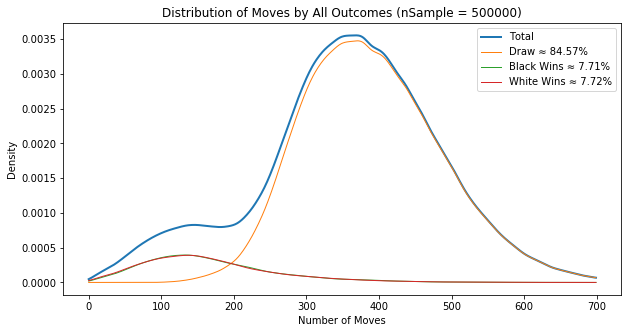

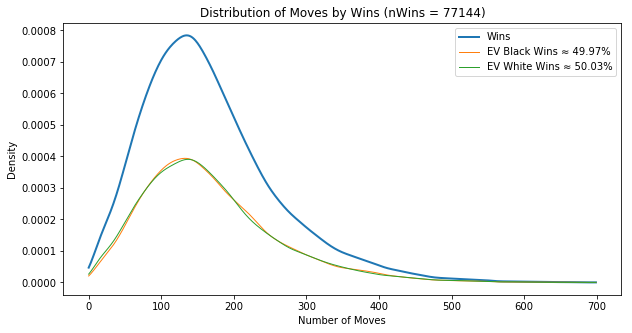

Most frequent moves of All: 368 0.0036 for 500000 games
Most frequent moves of Draws: 370 0.0035 for 422856 games
Most frequent moves of Wins: 135 0.0008 for 77144 games
Most frequent moves of Black wins: 133 0.0004 for 38546 games
Most frequent moves of White wins: 137 0.0004 for 38598 games


In [18]:
# from queue import Queue
# import chess, random, _thread
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy.stats

# def outcome(board):
#     if board.is_checkmate():
#         if board.turn:
#             return "Black"
#         else:
#             return "White"
#     else:
#         return "Draw"

# #calc total moves
# def moves(board):
#     if board.turn:
#         return board.fullmove_number * 2 - 1
#     else:
#         return board.fullmove_number * 2 - 2

# def play(i):
#     board = chess.Board()
#     while not board.is_game_over():
#         board.push(random.choice(list(board.legal_moves)))
#     return i, outcome(board), moves(board)

# def thread_wrapper(i, func, stat, q):
#     def run():
#         q.put(func)
#         stat[i] = True
#     return run

# workers = 500000
# status = [False for i in range(workers)]
# q = Queue()
# for i in range(workers):
#     _thread.start_new_thread(thread_wrapper(i, play(i), status, q), tuple())

# while not all(status):
#     pass

# results = []
# while not q.empty():
#     results.append(q.get())
# results_df = pd.DataFrame(results, columns=['game_n', 'outcome', 'moves'])
# #TODO process the results

# results_df.to_csv('my_file.csv')

# black = results_df.loc[results_df['outcome'] == 'Black']
# white = results_df.loc[results_df['outcome'] == 'White']
# draw = results_df.loc[results_df['outcome'] == 'Draw']
# win = results_df.loc[results_df['outcome'] != 'Draw']

# Total = len(results_df.index)
# Wins = len(win.index)

# PercentBlack = "Black Wins ≈ %s" % ('{0:.2%}'.format(len(black.index)/Total))
# PercentWhite = "White Wins ≈ %s" % ('{0:.2%}'.format(len(white.index)/Total))
# PercentDraw = "Draw ≈ %s" % ('{0:.2%}'.format(len(draw.index)/Total))
# AllTitle = 'Distribution of Moves by All Outcomes (nSample = %s)' % workers

# a = draw.moves
# b = black.moves
# c = white.moves

# kdea = scipy.stats.gaussian_kde(a)
# kdeb = scipy.stats.gaussian_kde(b)
# kdec = scipy.stats.gaussian_kde(c)

# grid = np.arange(700)

# #weighted kde curves
# wa = kdea(grid)*(len(a)/float(len(a)+len(b)+len(c)))
# wb = kdeb(grid)*(len(b)/float(len(a)+len(b)+len(c)))
# wc = kdec(grid)*(len(c)/float(len(a)+len(b)+len(c)))

# total = wa+wb+wc
# wtotal = wb+wc

plt.figure(figsize=(10,5))
plt.plot(grid, total, lw=2, label="Total")
plt.plot(grid, wa, lw=1, label=PercentDraw)
plt.plot(grid, wb, lw=1, label=PercentBlack)
plt.plot(grid, wc, lw=1, label=PercentWhite)
plt.title(AllTitle)
plt.ylabel('Density')
plt.xlabel('Number of Moves')
plt.legend()
plt.show()

ExpectedBlack = "EV Black Wins ≈ %s" % ('{0:.2%}'.format(len(black.index)/Wins))
ExpectedWhite = "EV White Wins ≈ %s" % ('{0:.2%}'.format(len(white.index)/Wins))
WinTitle = 'Distribution of Moves by Wins (nWins = %s)' % Wins

plt.figure(figsize=(10,5))
plt.plot(grid, wtotal, lw=2, label="Wins")
plt.plot(grid, wb, lw=1, label=ExpectedBlack)
plt.plot(grid, wc, lw=1, label=ExpectedWhite)
plt.title(WinTitle)
plt.ylabel('Density')
plt.xlabel('Number of Moves')
plt.legend()
plt.show()

print("Most frequent moves of All:", grid[total.argmax()], round(max(total), 4), "for", Total, "games")
print("Most frequent moves of Draws:", grid[wa.argmax()], round(max(wa), 4), "for", len(draw.index), "games")
print("Most frequent moves of Wins:", grid[wtotal.argmax()], round(max(wtotal), 4), "for", Wins, "games")
print("Most frequent moves of Black wins:", grid[wb.argmax()], round(max(wb), 4), "for", len(black.index), "games")
print("Most frequent moves of White wins:", grid[wc.argmax()], round(max(wc), 4), "for", len(white.index), "games")


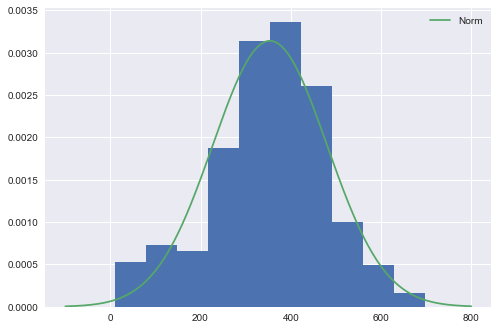

In [89]:
from scipy import stats  
import numpy as np  
import matplotlib.pylab as plt

# create some normal random noisy data
ser = results_df.moves

# plot normed histogram
plt.hist(ser, normed=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(ser))

# lets try the normal distribution first
m, s = stats.norm.fit(ser) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it

plt.legend()
plt.show()  

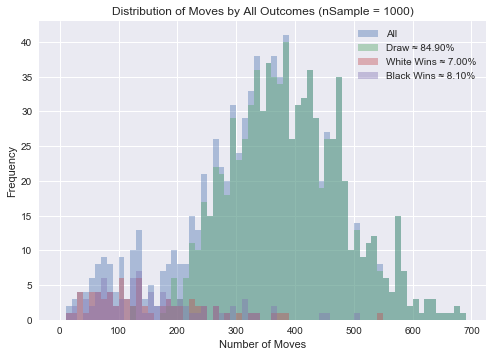

In [100]:
results_df.moves.hist(alpha=0.4, bins=range(0, 700, 10), label = "All")
draw.moves.hist(alpha=0.4, bins=range(0, 700, 10), label = PercentDraw)
white.moves.hist(alpha=0.4, bins=range(0, 700, 10), label = PercentWhite)
black.moves.hist(alpha=0.4, bins=range(0, 700, 10), label = PercentBlack)
plt.title(AllTitle)
plt.ylabel('Frequency')
plt.xlabel('Number of Moves')
plt.legend()
plt.show()

In [3]:
black.to_csv('black.csv')
white.to_csv('white.csv')
draw.to_csv('draw.csv')
win.to_csv('win.csv')




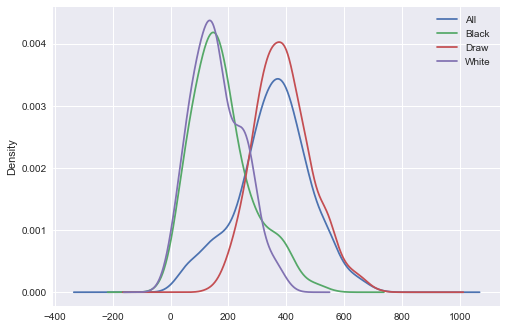

In [16]:
results_df.moves.plot(kind='kde', label = "All")
results_df.groupby("outcome").moves.plot(kind='kde')
plt.legend()
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


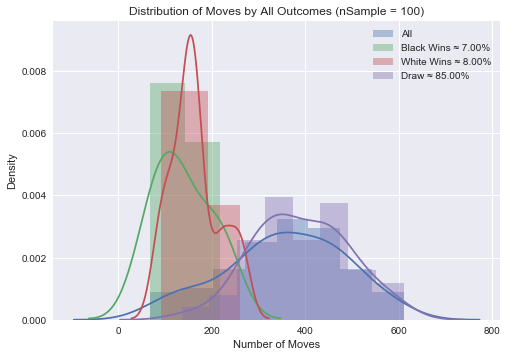

In [18]:
sns.distplot(results_df.moves, hist=True, label = "All")
sns.distplot(black.moves, hist=True, label=PercentBlack)
sns.distplot(white.moves, hist=True, label=PercentWhite)
sns.distplot(draw.moves, hist=True, label=PercentDraw)
plt.title(AllTitle)
plt.ylabel('Density')
plt.xlabel('Number of Moves')
plt.legend()
plt.show()

In [17]:
weighted.fit(fft=False,weights=white.moves)
plt.show()

NameError: name 'weighted' is not defined

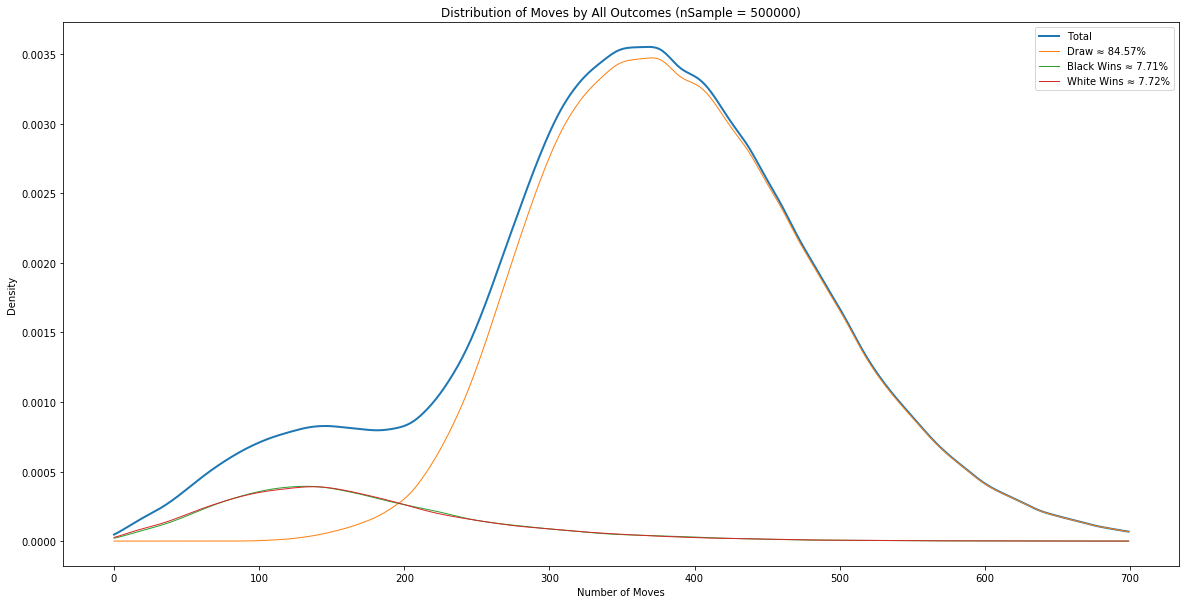

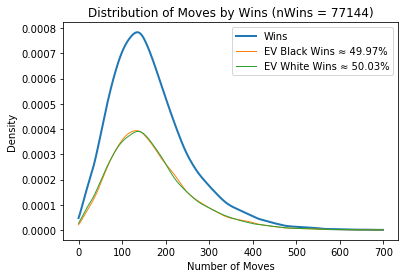

In [9]:
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy.stats

# a = draw.moves
# b = black.moves
# c = white.moves

# kdea = scipy.stats.gaussian_kde(a)
# kdeb = scipy.stats.gaussian_kde(b)
# kdec = scipy.stats.gaussian_kde(c)

# grid = np.arange(700)

# #weighted kde curves
# wa = kdea(grid)*(len(a)/float(len(a)+len(b)+len(c)))
# wb = kdeb(grid)*(len(b)/float(len(a)+len(b)+len(c)))
# wc = kdec(grid)*(len(c)/float(len(a)+len(b)+len(c)))

# total = wa+wb+wc
# wtotal = wb+wc



plt.figure(figsize=(20,10))
plt.plot(grid, total, lw=2, label = "Total")
plt.plot(grid, wa, lw=1, label = PercentDraw)
plt.plot(grid, wb, lw=1, label = PercentBlack)
plt.plot(grid, wc, lw=1, label = PercentWhite)
plt.title(AllTitle)
plt.ylabel('Density')
plt.xlabel('Number of Moves')
plt.legend()
plt.show()


plt.plot(grid, wtotal, lw=2, label = "Wins")
plt.plot(grid, wb, lw=1, label = ExpectedBlack)
plt.plot(grid, wc, lw=1, label = ExpectedWhite)
plt.title(WinTitle)
plt.ylabel('Density')
plt.xlabel('Number of Moves')
plt.legend()
plt.show()



0.000319905142491
700


In [70]:
print ("Most frequent moves of All:", grid[total.argmax()], round(max(total),4))
print ("Most frequent moves of Draws:", grid[wa.argmax()], round(max(wa),4))
print ("Most frequent moves of Wins:", grid[wtotal.argmax()], round(max(wtotal),4))
print ("Most frequent moves of Black wins:", grid[wb.argmax()], round(max(wb),4))
print ("Most frequent moves of White wins:", grid[wc.argmax()], round(max(wc),4))

Most frequent moves of All: 325 0.0034
Most frequent moves of Draws: 327 0.0032
Most frequent moves of Wins: 131 0.0007
Most frequent moves of Black wins: 115 0.0003
Most frequent moves of White wins: 161 0.0004
